## Import data

In [1]:
import pandas as pd
import numpy as np

In [2]:
explosives = pd.read_csv(r"mmc52.csv")

In [3]:
explosives

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,solid C,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE
0,NC(N)=C(N(=O)=O)N(=O)=O,1.92,78.80,0.73,-21.60,8,0.00,0,0,0.0,...,16.67,0.0,0.00,N-C,1.43,121.69,956.21,8.24,31.83,33.97
1,O=N(=O)N(CC(N(=O)=O)(N(=O)=O)N(=O)=O)CC(N(=O)=...,1.96,74.90,0.57,16.50,4,0.00,0,0,0.0,...,0.00,0.0,16.67,C-C,1.53,85.66,1061.80,8.59,35.08,18.83
2,Nc1c(c(N)c(c(N)c1N(=O)=O)N(=O)=O)N(=O)=O,1.98,78.20,0.64,-55.80,2,0.00,0,0,0.0,...,37.50,0.0,0.00,N-C,1.43,124.08,889.40,7.68,28.17,30.17
3,CN(=O)=O,1.49,69.50,0.34,-39.30,4,0.00,0,0,0.0,...,25.00,0.0,0.00,N-C,1.50,90.05,1276.30,7.46,22.28,14.97
4,NC(N)=C(N(=O)=O)N(=O)=O,1.95,80.00,0.74,-21.60,4,0.00,0,0,0.0,...,16.67,0.0,0.00,N-C,1.43,120.02,951.90,8.32,32.80,34.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,1.88,74.80,0.61,-34.30,16,0.00,0,0,0.0,...,27.08,0.0,0.00,C-C,1.59,88.64,1343.70,8.39,32.64,50.84
149,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,1.70,73.80,0.57,-54.80,6,0.00,0,0,0.0,...,34.48,0.0,0.00,C-C,1.61,86.35,1151.50,7.56,24.93,73.05
150,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,1.63,69.30,0.5,-73.30,12,0.75,0,0,0.0,...,41.67,0.0,0.00,C-C,1.54,76.29,1044.10,6.99,20.77,72.63
151,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,1.82,77.70,0.69,-13.60,6,0.00,0,0,0.0,...,11.91,0.0,0.00,C-C,1.59,88.61,1401.30,8.64,33.98,30.65


## Exploratory data analysis and visualization (identify NA, outliers, missing data)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
explosives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SMILES                    153 non-null    object 
 1   Material Density          153 non-null    float64
 2   PC                        153 non-null    float64
 3   Nitrogen density (g/cm3)  153 non-null    object 
 4   OB                        153 non-null    float64
 5   Nm                        153 non-null    int64  
 6   H2O                       153 non-null    float64
 7   CH3OH                     153 non-null    int64  
 8   C4H8O2                    153 non-null    int64  
 9   C4H6O2                    152 non-null    float64
 10  gasous N2                 153 non-null    float64
 11  gasous H2O                153 non-null    float64
 12  gasous CO2                153 non-null    float64
 13   solid C                  152 non-null    float64
 14  gasous NH3

#### type of three values is object,  for nitrogen density it should be float

In [6]:
explosives[explosives['Nitrogen density (g/cm3)'] == '0.65/0.61'] #a mistake was found and the value was changed to average

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,solid C,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE
60,O=N(=O)C1=C(C2=C(NN=C2N(=O)=O)N(=O)=O)C(=NN1)N...,1.83,71.88,0.65/0.61,-25.46,8,0.0,0,0,0.0,...,22.73,0.0,0.0,N-C,1.44,109.76,1303.0,8.12,30.11,31.96


In [7]:
explosives.loc[explosives['Nitrogen density (g/cm3)'] == '0.65/0.61', 'Nitrogen density (g/cm3)'] = 0.63

In [8]:
explosives['Nitrogen density (g/cm3)'] = explosives['Nitrogen density (g/cm3)'].astype(float)

In [9]:
explosives[explosives['Nitrogen density (g/cm3)'] == 0.63]

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,solid C,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE
60,O=N(=O)C1=C(C2=C(NN=C2N(=O)=O)N(=O)=O)C(=NN1)N...,1.83,71.88,0.63,-25.46,8,0.0,0,0,0.0,...,22.73,0.0,0.0,N-C,1.44,109.76,1303.0,8.12,30.11,31.96
84,O=N(=O)C1=C(CC2=C(NN=C2N(=O)=O)N(=O)=O)C(=NN1)...,1.84,73.43,0.63,-39.00,4,0.0,0,0,0.0,...,30.77,0.0,0.0,C-C,1.50,95.91,1253.9,7.97,29.06,35.67
99,O=N(=O)C1=NO[N+](=C1C1=[N+]([O-])ON=C1N(=O)=O)...,1.95,75.10,0.63,0.00,4,0.0,0,0,0.0,...,0.00,0.0,0.0,O-N,1.62,44.16,1631.0,9.20,40.09,15.24


In [10]:
explosives.dtypes #now all types of values are correct

SMILES                       object
Material Density            float64
PC                          float64
Nitrogen density (g/cm3)    float64
OB                          float64
Nm                            int64
H2O                         float64
CH3OH                         int64
C4H8O2                        int64
C4H6O2                      float64
gasous N2                   float64
gasous H2O                  float64
gasous CO2                  float64
 solid C                    float64
gasous NH3                  float64
gasous O2                   float64
Type1                        object
Length1                     float64
Strength 1                  float64
Qmax                        float64
D                           float64
pC-J                        float64
LE                          float64
dtype: object

In [11]:
explosives.describe()

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,...,gasous CO2,solid C,gasous NH3,gasous O2,Length1,Strength 1,Qmax,D,pC-J,LE
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,152.000000,153.000000,...,153.000000,152.000000,153.000000,153.000000,153.000000,152.000000,153.000000,153.000000,153.000000,153.000000
mean,1.795948,73.827320,0.624183,-44.871569,4.771242,0.065359,0.013072,0.045752,0.006579,30.339542,...,20.938954,31.322632,0.270458,0.751569,1.672353,85.442237,1226.441438,7.718889,27.300784,33.354837
std,0.111411,2.878552,0.224613,30.241511,2.875708,0.297704,0.161690,0.402948,0.081111,11.903860,...,12.225112,15.626651,2.158280,4.888577,1.347802,30.992824,243.490584,0.816697,6.361454,19.871206
min,1.370000,65.760000,0.210000,-139.300000,1.000000,0.000000,0.000000,0.000000,0.000000,7.140000,...,0.000000,0.000000,0.000000,0.000000,1.350000,-199.000000,379.300000,5.380000,10.910000,8.220000
25%,1.730000,71.920000,0.470000,-62.070000,4.000000,0.000000,0.000000,0.000000,0.000000,22.220000,...,12.500000,20.000000,0.000000,0.000000,1.440000,71.562500,1102.400000,7.160000,22.600000,20.860000
50%,1.810000,73.920000,0.630000,-44.580000,4.000000,0.000000,0.000000,0.000000,0.000000,31.250000,...,20.000000,33.330000,0.000000,0.000000,1.480000,92.095000,1277.600000,7.710000,26.790000,29.850000
75%,1.870000,75.630000,0.740000,-23.280000,6.000000,0.000000,0.000000,0.000000,0.000000,37.500000,...,26.920000,41.830000,0.000000,0.000000,1.530000,101.722500,1384.200000,8.340000,31.900000,37.520000
max,2.020000,82.170000,1.390000,42.660000,16.000000,2.000000,2.000000,4.000000,1.000000,75.000000,...,66.670000,67.860000,22.220000,44.440000,13.020000,124.080000,1886.600000,9.450000,42.340000,137.350000


## Add value for molecules missing data and outliers

In [12]:
print(explosives.isnull().sum()) 

SMILES                      0
Material Density            0
PC                          0
Nitrogen density (g/cm3)    0
OB                          0
Nm                          0
H2O                         0
CH3OH                       0
C4H8O2                      0
C4H6O2                      1
gasous N2                   0
gasous H2O                  0
gasous CO2                  0
 solid C                    1
gasous NH3                  0
gasous O2                   0
Type1                       0
Length1                     0
Strength 1                  1
Qmax                        0
D                           0
pC-J                        0
LE                          0
dtype: int64


In [13]:
# !pip install missingno

['C4H6O2', ' solid C', 'Strength 1']


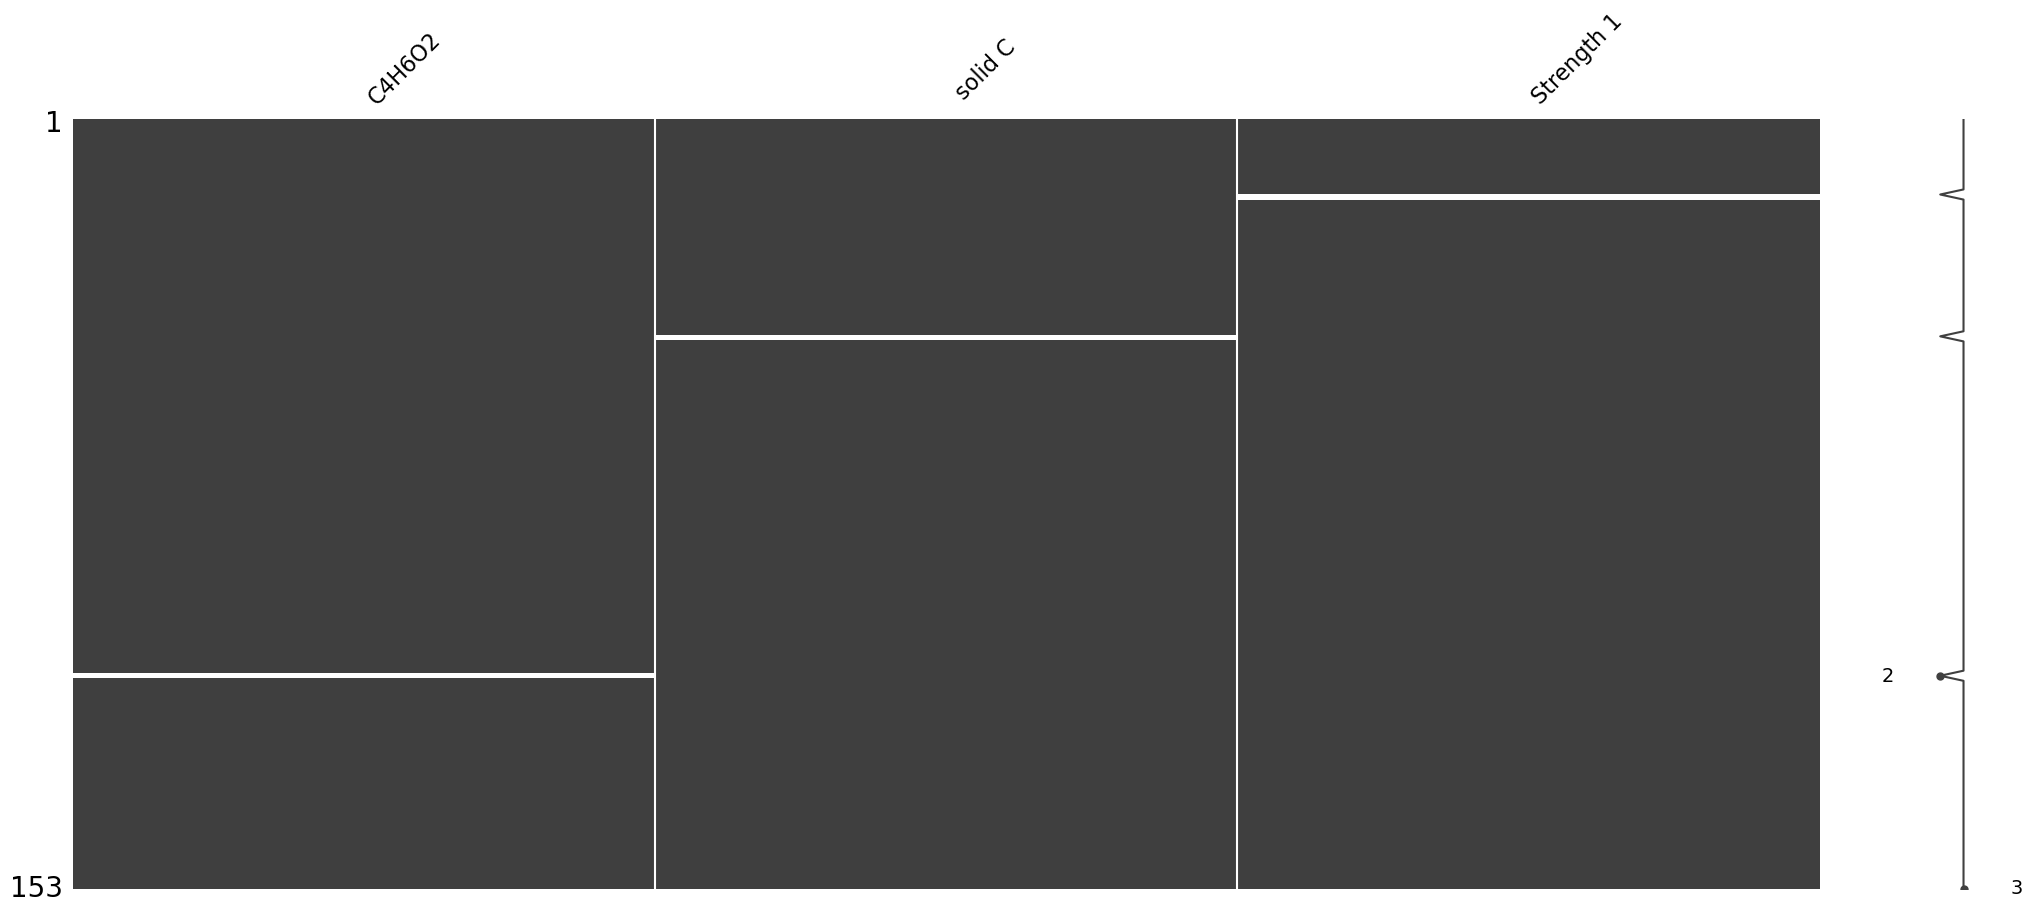

In [14]:
import missingno as msno
missingdata_df = explosives.columns[explosives.isnull().any()].tolist()
print(missingdata_df)
fig = msno.matrix(explosives[missingdata_df])
# plt.savefig('try.jpeg')

In [15]:
explosives.columns

Index(['SMILES', 'Material Density ', 'PC ', 'Nitrogen density (g/cm3)', 'OB',
       'Nm', 'H2O', 'CH3OH', 'C4H8O2', 'C4H6O2', 'gasous N2', 'gasous H2O',
       'gasous CO2', ' solid C', 'gasous NH3', 'gasous O2', 'Type1',
       'Length1 ', 'Strength 1', 'Qmax', 'D', 'pC-J', 'LE'],
      dtype='object')

In [16]:
explosives['Strength 1'].value_counts()

100.30    2
121.69    1
61.93     1
60.19     1
44.16     1
         ..
90.77     1
110.67    1
106.28    1
107.85    1
108.14    1
Name: Strength 1, Length: 151, dtype: int64

In [17]:
explosives[' solid C'].value_counts()

0.00     10
16.67     9
50.00     9
37.50     8
25.00     7
         ..
41.35     1
28.85     1
40.63     1
35.00     1
38.39     1
Name:  solid C, Length: 83, dtype: int64

In [18]:
mean = explosives['Strength 1'].mean()
explosives['Strength 1'] = explosives['Strength 1'].fillna(mean)

In [19]:
explosives['C4H6O2'].value_counts()

0.0    151
1.0      1
Name: C4H6O2, dtype: int64

In [20]:
counts = explosives['C4H6O2'].value_counts()

In [21]:
explosives['C4H6O2'] = explosives['C4H6O2'].fillna(counts.index[0])

In [22]:
print(explosives.isnull().sum()) 

SMILES                      0
Material Density            0
PC                          0
Nitrogen density (g/cm3)    0
OB                          0
Nm                          0
H2O                         0
CH3OH                       0
C4H8O2                      0
C4H6O2                      0
gasous N2                   0
gasous H2O                  0
gasous CO2                  0
 solid C                    1
gasous NH3                  0
gasous O2                   0
Type1                       0
Length1                     0
Strength 1                  0
Qmax                        0
D                           0
pC-J                        0
LE                          0
dtype: int64


In [23]:
explosives_copy = explosives.copy()
explosives_copy.dropna(inplace=True) #described in detail in the Word document why exactly these values were added instead of missing data

In [24]:
explosives_copy.describe()

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,...,gasous CO2,solid C,gasous NH3,gasous O2,Length1,Strength 1,Qmax,D,pC-J,LE
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1.797105,73.853158,0.626579,-44.654934,4.776316,0.065789,0.013158,0.046053,0.006579,30.463224,...,20.988158,31.322632,0.272237,0.756513,1.673421,85.527975,1226.184474,7.724276,27.347895,33.415526
std,0.110852,2.870213,0.223385,30.222139,2.884527,0.298640,0.162221,0.404262,0.081111,11.844169,...,12.250316,15.626651,2.165303,4.904354,1.352192,30.974554,244.274699,0.816665,6.355650,19.922664
min,1.370000,65.760000,0.210000,-139.300000,1.000000,0.000000,0.000000,0.000000,0.000000,7.140000,...,0.000000,0.000000,0.000000,0.000000,1.350000,-199.000000,379.300000,5.380000,10.910000,8.220000
25%,1.737500,71.980000,0.470000,-62.040000,3.750000,0.000000,0.000000,0.000000,0.000000,22.430000,...,12.500000,20.000000,0.000000,0.000000,1.440000,71.562500,1101.375000,7.160000,22.667500,20.807500
50%,1.815000,73.960000,0.630000,-44.500000,4.000000,0.000000,0.000000,0.000000,0.000000,31.415000,...,20.000000,33.330000,0.000000,0.000000,1.480000,92.095000,1280.600000,7.715000,26.815000,29.880000
75%,1.870000,75.647500,0.740000,-23.170000,6.000000,0.000000,0.000000,0.000000,0.000000,37.500000,...,27.135000,41.830000,0.000000,0.000000,1.530000,101.722500,1384.625000,8.347500,31.917500,37.525000
max,2.020000,82.170000,1.390000,42.660000,16.000000,2.000000,2.000000,4.000000,1.000000,75.000000,...,66.670000,67.860000,22.220000,44.440000,13.020000,124.080000,1886.600000,9.450000,42.340000,137.350000


#### After checking std and mean values, both of them did not change at all (only the third or fourth number after a comma), so decisions made when filling in missing values are acceptable 

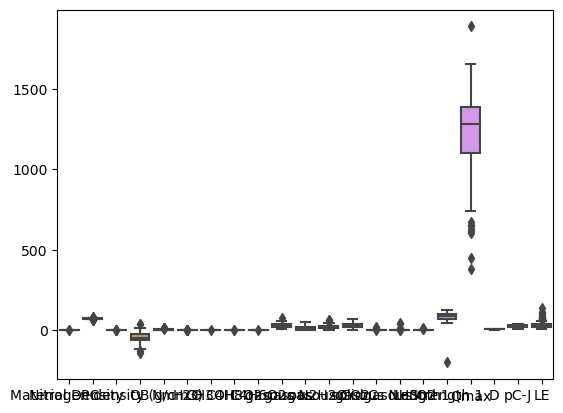

In [25]:
outl = sns.boxplot(explosives_copy)

## Data standardization

#### StandardScaler was used to normilize the data, and plot it again

In [26]:
explosives_copy.head()

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,solid C,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE
0,NC(N)=C(N(=O)=O)N(=O)=O,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,...,16.67,0.0,0.00,N-C,1.43,121.69,956.21,8.24,31.83,33.97
1,O=N(=O)N(CC(N(=O)=O)(N(=O)=O)N(=O)=O)CC(N(=O)=...,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,...,0.00,0.0,16.67,C-C,1.53,85.66,1061.80,8.59,35.08,18.83
2,Nc1c(c(N)c(c(N)c1N(=O)=O)N(=O)=O)N(=O)=O,1.98,78.2,0.64,-55.8,2,0.0,0,0,0.0,...,37.50,0.0,0.00,N-C,1.43,124.08,889.40,7.68,28.17,30.17
3,CN(=O)=O,1.49,69.5,0.34,-39.3,4,0.0,0,0,0.0,...,25.00,0.0,0.00,N-C,1.50,90.05,1276.30,7.46,22.28,14.97
4,NC(N)=C(N(=O)=O)N(=O)=O,1.95,80.0,0.74,-21.6,4,0.0,0,0,0.0,...,16.67,0.0,0.00,N-C,1.43,120.02,951.90,8.32,32.80,34.55


In [27]:
data_pca = explosives_copy.copy()
data_pca = data_pca.drop(labels = ['SMILES', 'Type1'],axis = 1)

In [28]:
data_pca.head()

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,...,gasous CO2,solid C,gasous NH3,gasous O2,Length1,Strength 1,Qmax,D,pC-J,LE
0,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,33.33,...,16.67,16.67,0.0,0.00,1.43,121.69,956.21,8.24,31.83,33.97
1,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,33.33,...,33.33,0.00,0.0,16.67,1.53,85.66,1061.80,8.59,35.08,18.83
2,1.98,78.2,0.64,-55.8,2,0.0,0,0,0.0,25.00,...,12.50,37.50,0.0,0.00,1.43,124.08,889.40,7.68,28.17,30.17
3,1.49,69.5,0.34,-39.3,4,0.0,0,0,0.0,16.67,...,8.33,25.00,0.0,0.00,1.50,90.05,1276.30,7.46,22.28,14.97
4,1.95,80.0,0.74,-21.6,4,0.0,0,0,0.0,33.33,...,16.67,16.67,0.0,0.00,1.43,120.02,951.90,8.32,32.80,34.55


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_pca)
scaled_data = scaler.transform(data_pca)
scaled_data

array([[ 1.11229893,  1.72920805,  0.46450299, ...,  0.63358754,
         0.70754718,  0.02792331],
       [ 1.47433198,  0.36593199, -0.25411741, ...,  1.06357678,
         1.22059367, -0.73452741],
       [ 1.65534851,  1.51947327,  0.06027901, ..., -0.05439526,
         0.12977791, -0.16344477],
       ...,
       [-1.51244073, -1.5915926 , -0.56851384, ..., -0.90208834,
        -1.03838947,  1.97484171],
       [ 0.20721629,  1.34469429,  0.28484789, ...,  1.12500382,
         1.04694716, -0.13927196],
       [-0.96939114, -1.17561862,  0.50941676, ..., -0.69323642,
        -0.80159878,  3.66442041]])

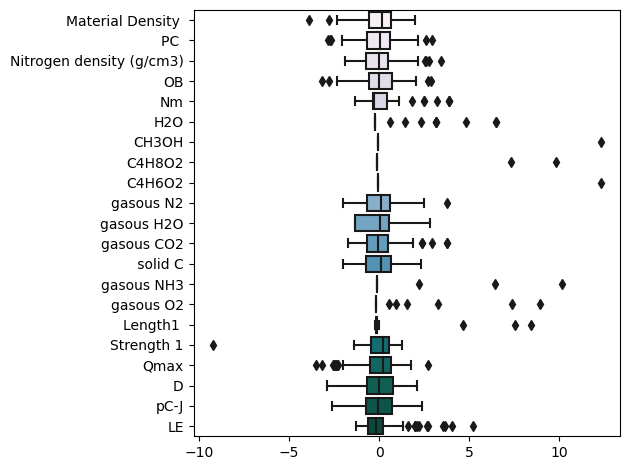

In [30]:
df_scaled = pd.DataFrame(data=scaled_data, columns=data_pca.columns)
ax = sns.boxplot(data=df_scaled, orient='h', palette='PuBuGn')
plt.tight_layout()
# plt.savefig('outliners.jpeg')

#### Outliners can be seen clearly now, will change them based on the chemistry knowledge 

In [31]:
explosives_copy[explosives_copy['Strength 1'] < 0]

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,solid C,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE
56,O=N(=O)c1cc(c(c(c1)N(=O)=O)c1c(cc(cc1N(=O)=O)N...,1.81,73.91,0.36,-52.8,4,0.0,0,0,0.0,...,41.18,0.0,0.0,N-C,1.48,-199.0,1384.2,7.67,26.7,24.73


In [32]:
median = explosives_copy['Strength 1'].median()
median

92.095

In [33]:
explosives_copy.loc[explosives_copy['Strength 1'] < 0, 'Strength 1'] = median

In [34]:
mean = explosives_copy['Length1 '].mean()
std = explosives_copy['Length1 '].std()
    
N = 1.5
upper = mean + N*std
print(upper) #score more than this value will be considered as an outlier

3.701709482831352


In [35]:
explosives_copy[explosives_copy['Length1 '] > 3.7] 

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,solid C,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE
15,O=N(=O)c1cc2N3[N-]c4c(cc(cc4N(=O)=O)N(=O)=O)[N...,1.84,74.60,0.53,-74.20,4,0.0,0,0,0.0,...,50.00,0.0,0.0,N-N,11.80,85.442237,1252.3,7.32,24.52,34.24
29,O=N(=O)N1CN(CN(CN(C1)N(=O)=O)N(=O)=O)N(=O)=O,1.90,81.30,0.72,-21.60,2,0.0,0,0,0.0,...,16.67,0.0,0.0,N-C,7.92,95.580000,1300.3,8.84,36.47,37.81
131,NC1=C(C(=O)N2N1C(=O)C(=C2N)N(=O)=O)N(=O)=O.O,1.89,82.17,0.62,-49.97,2,2.0,0,0,0.0,...,30.77,0.0,0.0,N-N,13.02,98.310000,627.6,7.01,22.88,72.97


In [36]:
median = explosives_copy['Length1 '].median()
median

1.48

In [37]:
explosives_copy.loc[explosives_copy['Length1 '] > 2, 'Length1 '] = median

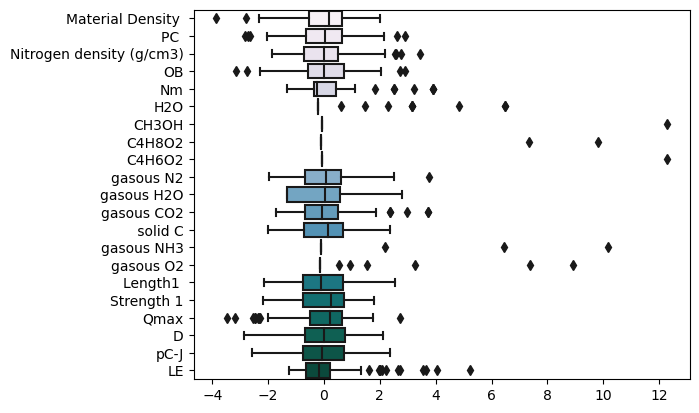

In [38]:
data_pca = explosives_copy.copy()
data_pca = data_pca.drop(labels = ['SMILES', 'Type1'],axis = 1)

data_pca.head()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_pca)
scaled_data = scaler.transform(data_pca)
scaled_data

df_scaled = pd.DataFrame(data=scaled_data, columns=data_pca.columns)
ax = sns.boxplot(data=df_scaled, orient='h', palette='PuBuGn')

In [39]:
explosives_copy.Type1.value_counts() #for the same type of bond, we have a different name, which is not correct

N-C     42
O-N     32
C-C     22
N-C     19
C-C     14
N-N     11
O-C      6
O-N      5
 O-C     1
Name: Type1, dtype: int64

In [40]:
explosives_copy.loc[explosives_copy['Type1'] == ' O-C', 'Type1'] = 'O-C'
explosives_copy.loc[explosives_copy['Type1'] == 'O-N ', 'Type1'] = 'O-N'
explosives_copy.loc[explosives_copy['Type1'] == 'C-C ', 'Type1'] = 'C-C'
explosives_copy.loc[explosives_copy['Type1'] == 'N-C ', 'Type1'] = 'N-C'

In [41]:
explosives_copy.Type1.value_counts()

N-C    61
O-N    37
C-C    36
N-N    11
O-C     7
Name: Type1, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_16088\235773918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(explosives_copy.corr()))
C:\Users\User\AppData\Local\Temp\ipykernel_16088\235773918.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(explosives_copy.corr(), cmap="YlGnBu", annot=True, mask=mask)


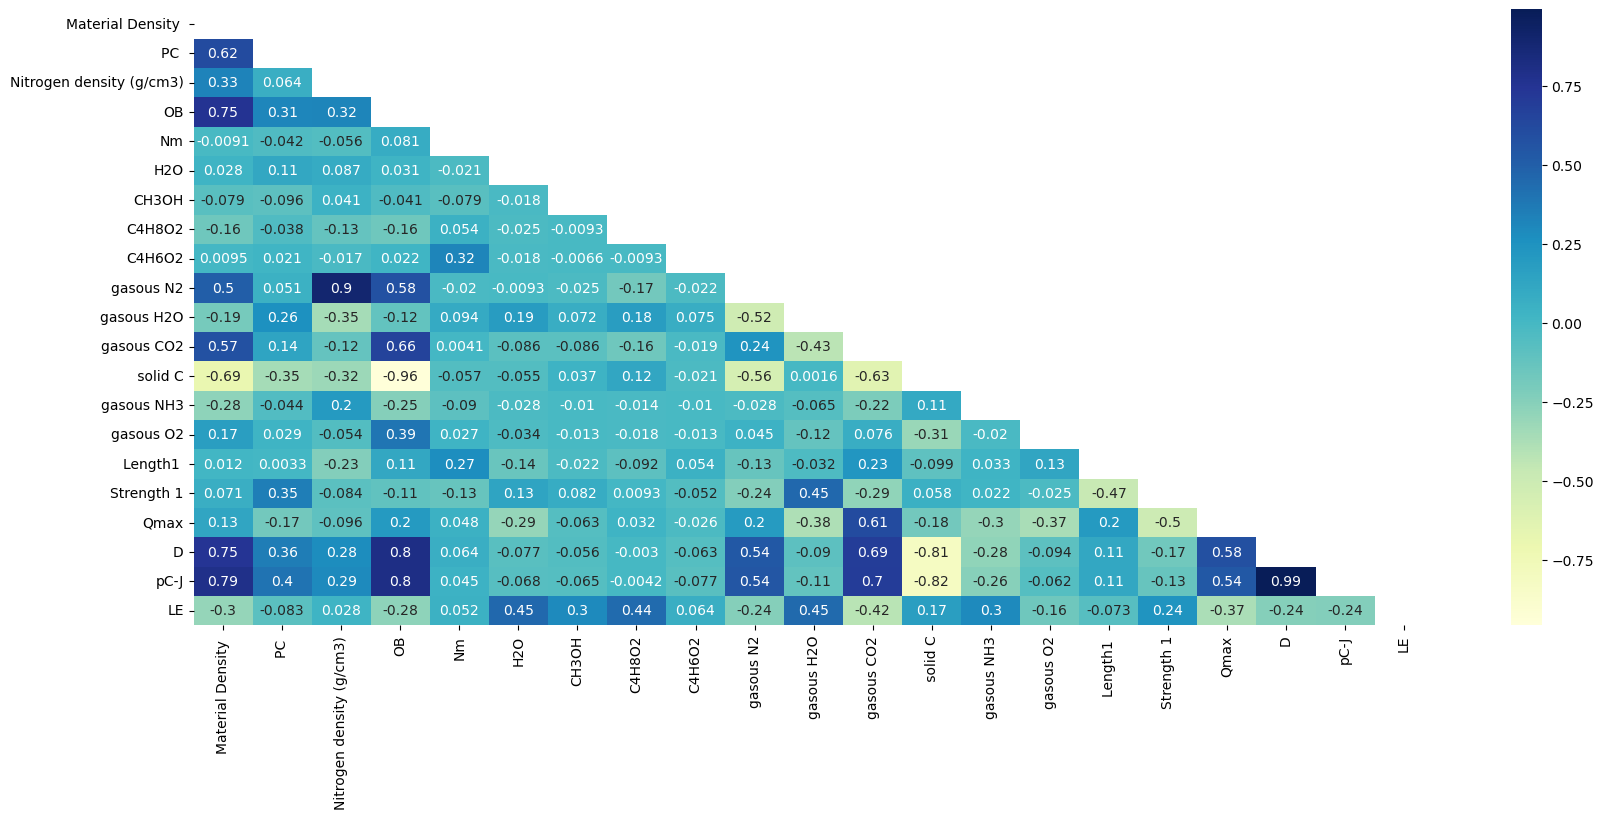

In [42]:
mask = np.triu(np.ones_like(explosives_copy.corr()))
from matplotlib.pyplot import figure

figure(figsize=(20, 8))
dataplot = sns.heatmap(explosives_copy.corr(), cmap="YlGnBu", annot=True, mask=mask)
# plt.savefig('correlation.jpeg')

## Dimensionality reduction (e.g., PCA)

In [43]:
from sklearn.decomposition import PCA

In [44]:
explosives_descriptors = explosives_copy.drop(labels = ['Qmax', 'Type1', 'SMILES'],axis = 1)
explosives_properties = explosives_copy['Qmax']

In [45]:
explosives_descriptors

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,gasous H2O,gasous CO2,solid C,gasous NH3,gasous O2,Length1,Strength 1,D,pC-J,LE
0,1.92,78.80,0.73,-21.60,8,0.00,0,0,0.0,33.33,33.33,16.67,16.67,0.0,0.00,1.43,121.69,8.24,31.83,33.97
1,1.96,74.90,0.57,16.50,4,0.00,0,0,0.0,33.33,16.67,33.33,0.00,0.0,16.67,1.53,85.66,8.59,35.08,18.83
2,1.98,78.20,0.64,-55.80,2,0.00,0,0,0.0,25.00,25.00,12.50,37.50,0.0,0.00,1.43,124.08,7.68,28.17,30.17
3,1.49,69.50,0.34,-39.30,4,0.00,0,0,0.0,16.67,50.00,8.33,25.00,0.0,0.00,1.50,90.05,7.46,22.28,14.97
4,1.95,80.00,0.74,-21.60,4,0.00,0,0,0.0,33.33,33.33,16.67,16.67,0.0,0.00,1.43,120.02,8.32,32.80,34.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.88,74.80,0.61,-34.30,16,0.00,0,0,0.0,29.17,20.83,22.92,27.08,0.0,0.00,1.59,88.64,8.39,32.64,50.84
149,1.70,73.80,0.57,-54.80,6,0.00,0,0,0.0,24.14,34.48,6.90,34.48,0.0,0.00,1.61,86.35,7.56,24.93,73.05
150,1.63,69.30,0.50,-73.30,12,0.75,0,0,0.0,19.44,36.11,2.78,41.67,0.0,0.00,1.54,76.29,6.99,20.77,72.63
151,1.82,77.70,0.69,-13.60,6,0.00,0,0,0.0,38.10,23.81,26.19,11.91,0.0,0.00,1.59,88.61,8.64,33.98,30.65


In [46]:
explosives_properties.head()

0     956.21
1    1061.80
2     889.40
3    1276.30
4     951.90
Name: Qmax, dtype: float64

In [47]:
pca_column_names = ['First principal component', 'Second Principal Component']
pca = PCA(n_components=2)
PCA_ex = pca.fit_transform(explosives_descriptors)
PCA_ex

array([[-1.82249448e+01,  3.97245118e+01],
       [-7.03289186e+01,  1.18181600e+01],
       [ 1.93868379e+01,  2.48775505e+01],
       [-8.74538586e-01,  8.73297551e+00],
       [-1.84623199e+01,  3.89263444e+01],
       [-1.81533949e+01,  3.81805825e+01],
       [-1.84556446e+01, -5.29688593e-02],
       [-5.59284377e+01,  1.25809263e+01],
       [-7.53865172e+00,  8.26070460e+00],
       [-4.01781274e+01,  7.05889514e+00],
       [ 7.55781084e+01, -1.89194849e+01],
       [ 5.14522638e+01, -1.01924898e+01],
       [ 1.01280561e+02, -2.13765616e+01],
       [-1.75940830e+01,  9.12710446e+00],
       [ 7.76769252e+00,  2.66630133e+00],
       [ 3.36596596e+01, -1.28131537e+01],
       [-4.53531792e+00,  4.13681156e+01],
       [-8.69961333e+00,  1.09405320e+01],
       [-5.85813366e+01,  3.49109708e+00],
       [-3.51449434e+01,  1.24862930e+00],
       [-1.98062332e+01,  2.34172118e+01],
       [-2.10486813e+01,  7.62614965e+00],
       [ 5.65119445e+01, -1.11962399e+01],
       [ 5.

In [48]:
pca_df = pd.DataFrame(PCA_ex, columns=pca_column_names, index=explosives_descriptors.index)
pca_df

,First principal component,Second Principal Component
0,-18.224945,39.724512
1,-70.328919,11.818160
2,19.386838,24.877551
3,-0.874539,8.732976
4,-18.462320,38.926344
...,...,...
148,-6.434976,14.796613
149,25.008816,24.411451
150,43.980460,12.040859
151,-36.170165,12.899367


In [49]:
pca_two = pd.concat([pca_df, explosives_properties], axis='columns')

In [50]:
pca_two.head()

,First principal component,Second Principal Component,Qmax
0,-18.224945,39.724512,956.21
1,-70.328919,11.818160,1061.80
2,19.386838,24.877551,889.40
3,-0.874539,8.732976,1276.30
4,-18.462320,38.926344,951.90


<AxesSubplot: xlabel='First principal component', ylabel='Second Principal Component'>

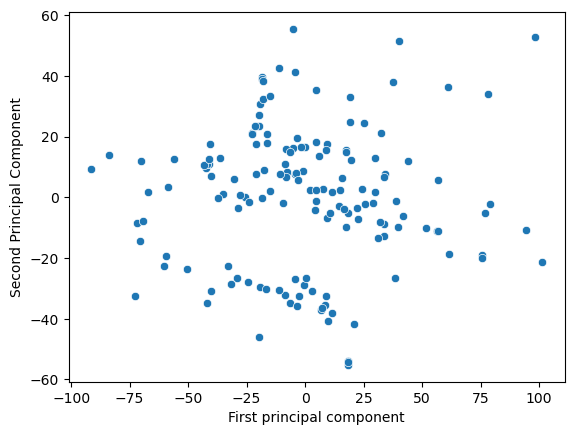

In [51]:
sns.scatterplot(data=pca_two, x='First principal component', y='Second Principal Component')

<AxesSubplot: xlabel='First principal component', ylabel='Second Principal Component'>

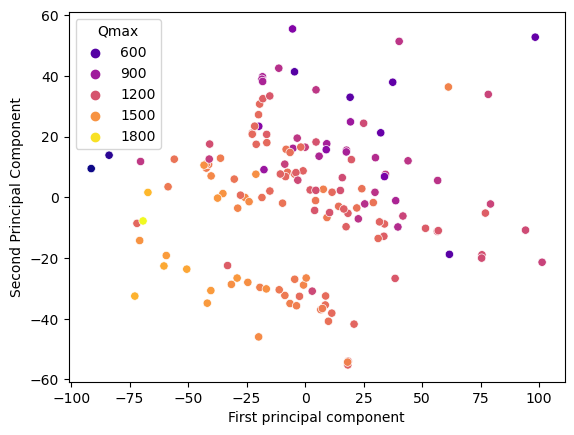

In [52]:
sns.scatterplot(data=pca_two, x='First principal component', y='Second Principal Component', hue='Qmax', palette='plasma')
# plt.savefig('PCA.jpeg')

[Text(0, 0.5, 'Explained Variance (%)')]

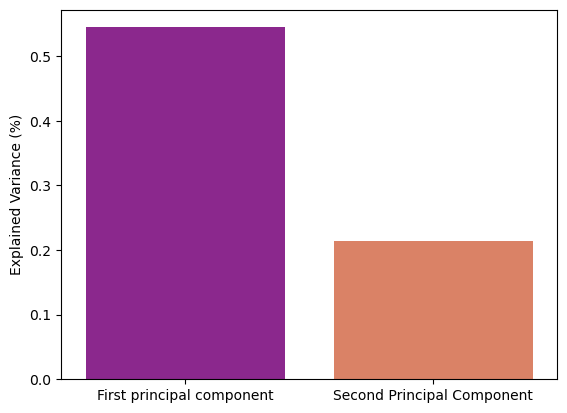

In [53]:
explained_variance= pd.DataFrame(data=pca.explained_variance_ratio_, index=pca_column_names)

ax = sns.barplot(data=explained_variance.transpose(), palette='plasma')
ax.set(ylabel='Explained Variance (%)')
# plt.savefig('Explained Variance.jpeg')

## Clustering of molecules

In [54]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
k_rng = range(1,30)
sum_squared_error_groups = [] 

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(explosives_descriptors)
    sum_squared_error_groups.append(km.inertia_)

finding_k_results = pd.DataFrame({'k': k_rng, 'SSE': sum_squared_error_groups})

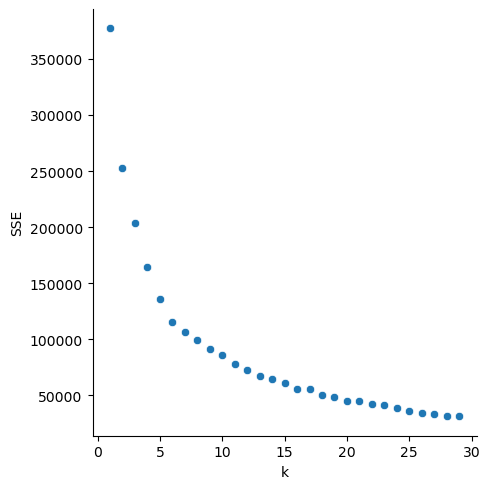

In [55]:
sns.relplot(data=finding_k_results, x='k', y='SSE')
# plt.savefig('Elbow.jpeg')

In [56]:
km = KMeans(n_clusters=6)

clusters = km.fit(explosives_descriptors)

In [57]:
clusters_df = pd.DataFrame([",".join(group) for group in clusters.labels_.astype(str)], index=pca_df.index, columns=['kMeans-Cluster'])

pca_kMeans = pd.concat([pca_df, clusters_df], axis='columns')

<AxesSubplot: xlabel='First principal component', ylabel='Second Principal Component'>

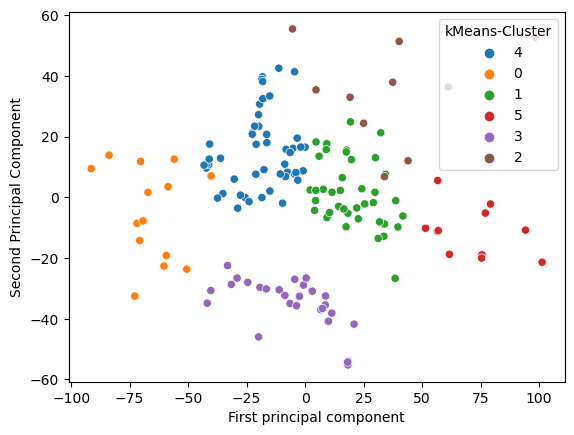

In [58]:
sns.scatterplot(data=pca_kMeans, x='First principal component', y='Second Principal Component', hue='kMeans-Cluster')
# plt.savefig('KMeans.jpeg')

## Data enrichment (compute chemical features, e.g., RDKit)

In [59]:
from rdkit import Chem 
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw 
from  rdkit.Chem import Descriptors
import mols2grid 
from rdkit import Chem
import tqdm
from rdkit.Chem.Draw import MolsToGridImage
from  rdkit.Chem import PandasTools

In [60]:
mols2grid.display(explosives_copy, smiles_col='SMILES')

MolGridWidget()

In [61]:
explosives_copy.shape

(152, 23)

In [62]:
data = explosives_copy.drop_duplicates(['SMILES']) #get rid of duplicates
data.shape

(147, 23)

In [63]:
import pandas.io.formats.style

In [64]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol = 'SMILES')
PandasTools.RenderImagesInAllDataFrames(images=True)
data.head(2)

[15:03:27] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[15:03:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 14 N, 4, is greater than permitted
[15:03:27] Explicit valence for atom # 31 N, 4, is greater than permitted


,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE,ROMol
0,NC(N)=C(N(=O)=O)N(=O)=O,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,...,0.0,0.00,N-C,1.43,121.69,956.21,8.24,31.83,33.97,<rdkit.Chem.rdchem.Mol object at 0x000002BF4EC...
1,O=N(=O)N(CC(N(=O)=O)(N(=O)=O)N(=O)=O)CC(N(=O)=...,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,...,0.0,16.67,C-C,1.53,85.66,1061.80,8.59,35.08,18.83,<rdkit.Chem.rdchem.Mol object at 0x000002BF4EC...


In [65]:
print(data.isnull().sum()) 

SMILES                       0
Material Density             0
PC                           0
Nitrogen density (g/cm3)     0
OB                           0
Nm                           0
H2O                          0
CH3OH                        0
C4H8O2                       0
C4H6O2                       0
gasous N2                    0
gasous H2O                   0
gasous CO2                   0
 solid C                     0
gasous NH3                   0
gasous O2                    0
Type1                        0
Length1                      0
Strength 1                   0
Qmax                         0
D                            0
pC-J                         0
LE                           0
ROMol                       12
dtype: int64


In [66]:
glvc = Chem.MolFromSmiles('[O]N1=C(C2=NC(=NO2)C#N)C(=NO1)C#N', sanitize=False) #some molecules do not have the right charges, so  ‘sanitize=False’ was used to show them

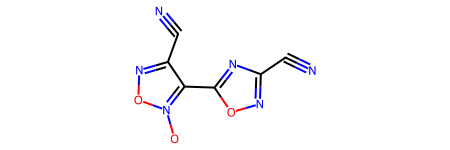

In [67]:
glvc 

In [68]:
Nana = data[data["ROMol"].isnull()]

In [69]:
a = list(Nana["SMILES"])
a

['[O]n1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O',
 'Nc1c(cc(c(N)n1[O])N(=O)=O)N(=O)=O',
 '[O]N1=C(C2=NC(=NO2)C#N)C(=NO1)C#N',
 '[O]N1=C(C#N)C(=NO1)C1=NC(=NO1)C#N',
 '[O]N(=NN(=O)=O)C1=NON=C1OC1=NON=C1N([O])=NN(=O)=O',
 'N#N[N]C1=NC2=NON=C2N2N=NN=C12',
 '[O]N1=NC2=NON=C2N=NC2=NON=C2N=N([O])C2=NON=C2N=NC2=NON=C12',
 '[O]N1=NC2=NON=C2N(=NC2=NON=C2N(=NC2=NON=C2N(=NC2=NON=C12)[O])[O])[O]',
 '[O]N(=NC1=NON=C1N(=O)=O)C1=NON=C1N(=O)=O.[O]N(=NC1=NON=C1N(=O)=O)C1=NON=C1N(=O)=O',
 '[O]N1=C(C(=NO1)C1=NON=C1N(=O)=O)C1=NON=C1N(=O)=O',
 'O=N(=O)N1CC(C1)(N(=O)=O)N(=O)=O.[O]N1=C2C(=NO1)C1=N([O])ON=C1C1=N([O])ON=C21',
 'O=N(=O)N1C2C3N(C4C1N(C(C(N2N(=O)=O)N3N(=O)=O)N4N(=O)=O)N(=O)=O)N(=O)=O.O=N1ONc2c1c1NON(=O)c1c1NON(=O)c21']

In [70]:
data.loc[data['SMILES'] == '[O]n1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O', 'SMILES'] = '[O-][N+]1=C([N+]([O-])=O)C=C([N+]([O-])=O)C=C1[N+]([O-])=O'
data.loc[data['SMILES'] == 'Nc1c(cc(c(N)n1[O])N(=O)=O)N(=O)=O', 'SMILES'] = 'NC1=C([N+](O)=O)C=C([N+](O)=O)C(N)=[N+]1[O-]'
data.loc[data['SMILES'] == '[O]N1=C(C2=NC(=NO2)C#N)C(=NO1)C#N', 'SMILES'] = '[O-][N+]1=C(C(C#N)=NO1)C2=NC(C#N)=NO2'
data.loc[data['SMILES'] == '[O]N1=C(C#N)C(=NO1)C1=NC(=NO1)C#N', 'SMILES'] = '[O-][N+]1=C(C(C2=NC(C#N)=NO2)=NO1)C#N'
data.loc[data['SMILES'] == '[O]N(=NN(=O)=O)C1=NON=C1OC1=NON=C1N([O])=NN(=O)=O', 'SMILES'] = '[O-]/[N+](C1=NON=C1OC2=NON=C2/[N+]([O-])=N/[N+](O)=O)=N\[N+](O)=O'
data.loc[data['SMILES'] == 'N#N[N]C1=NC2=NON=C2N2N=NN=C12', 'SMILES'] = 'N#[N+][N-]C1=NC2=NON=C2N3N=NN=C13'
data.loc[data['SMILES'] == '[O]N1=NC2=NON=C2N=NC2=NON=C2N=N([O])C2=NON=C2N=NC2=NON=C12', 'SMILES'] = '[O-]/[N+]1=N\C2=NON=C2N=NC3=NON=C3/N=[N+](C4=NON=C4N=NC5=NON=C15)\[O-]'
data.loc[data['SMILES'] == '[O]N1=NC2=NON=C2N(=NC2=NON=C2N(=NC2=NON=C2N(=NC2=NON=C12)[O])[O])[O]', 'SMILES'] = '[O-]/[N+]1=N\C2=NON=C2/[N+]([O-])=N/C3=NON=C3/[N+]([O-])=N/C4=NON=C4/[N+]([O-])=N/C5=NON=C15'
data.loc[data['SMILES'] == '[O]N(=NC1=NON=C1N(=O)=O)C1=NON=C1N(=O)=O.[O]N(=NC1=NON=C1N(=O)=O)C1=NON=C1N(=O)=O', 'SMILES'] = '[O-]/[N+](C1=NON=C1[N+]([O-])=O)=N\C2=NON=C2[N+]([O-])=O'
data.loc[data['SMILES'] == '[O]N1=C(C(=NO1)C1=NON=C1N(=O)=O)C1=NON=C1N(=O)=O', 'SMILES'] = '[O-][N+]1=C(C2=NON=C2[N+]([O-])=O)C(C3=NON=C3[N+]([O-])=O)=NO1'
data.loc[data['SMILES'] == 'O=N(=O)N1CC(C1)(N(=O)=O)N(=O)=O.[O]N1=C2C(=NO1)C1=N([O])ON=C1C1=N([O])ON=C21', 'SMILES'] = '[O-][N+](N1CC([N+]([O-])=O)([N+]([O-])=O)C1)=O.[O-][N+]2=C3C(C4=[N+](ON=C4C5=[N+](ON=C35)[O-])[O-])=NO2'
data.loc[data['SMILES'] == 'O=N(=O)N1C2C3N(C4C1N(C(C(N2N(=O)=O)N3N(=O)=O)N4N(=O)=O)N(=O)=O)N(=O)=O.O=N1ONc2c1c1NON(=O)c1c1NON(=O)c21', 'SMILES'] = 'O=[N+](N1C2C3N([N+]([O-])=O)C4C1N([N+]([O-])=O)C(N4[N+]([O-])=O)C(N3[N+]([O-])=O)N2[N+]([O-])=O)[O-].O=[N+]5ONc6c7c(NO[N+]7=O)c8c(NO[N+]8=O)c65'

In [71]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol = 'SMILES')
PandasTools.RenderImagesInAllDataFrames(images=True)
data.head() #without error now

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,gasous NH3,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE,ROMol
0,NC(N)=C(N(=O)=O)N(=O)=O,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,...,0.0,0.00,N-C,1.43,121.69,956.21,8.24,31.83,33.97,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...
1,O=N(=O)N(CC(N(=O)=O)(N(=O)=O)N(=O)=O)CC(N(=O)=...,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,...,0.0,16.67,C-C,1.53,85.66,1061.80,8.59,35.08,18.83,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...
2,Nc1c(c(N)c(c(N)c1N(=O)=O)N(=O)=O)N(=O)=O,1.98,78.2,0.64,-55.8,2,0.0,0,0,0.0,...,0.0,0.00,N-C,1.43,124.08,889.40,7.68,28.17,30.17,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...
3,CN(=O)=O,1.49,69.5,0.34,-39.3,4,0.0,0,0,0.0,...,0.0,0.00,N-C,1.50,90.05,1276.30,7.46,22.28,14.97,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...
6,O=N(=O)OCCN(CCON(=O)=O)N(=O)=O,1.73,73.8,0.40,-26.7,4,0.0,0,0,0.0,...,0.0,0.00,O-C,1.49,68.74,1346.80,8.26,30.10,28.14,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...


In [72]:
print(data.isnull().sum()) 

SMILES                      0
Material Density            0
PC                          0
Nitrogen density (g/cm3)    0
OB                          0
Nm                          0
H2O                         0
CH3OH                       0
C4H8O2                      0
C4H6O2                      0
gasous N2                   0
gasous H2O                  0
gasous CO2                  0
 solid C                    0
gasous NH3                  0
gasous O2                   0
Type1                       0
Length1                     0
Strength 1                  0
Qmax                        0
D                           0
pC-J                        0
LE                          0
ROMol                       0
dtype: int64


In [73]:
data_copy = data.copy()

In [74]:
from rdkit.Chem.MolStandardize import rdMolStandardize   
lfc = rdMolStandardize.LargestFragmentChooser() #in one cell there are some compounds (solvents, similar compounds, and different compounds), the biggest compound will be saved)
smiles_list = data_copy['SMILES']
mol_list = []
for smiles in smiles_list:
    big = lfc.choose(Chem.MolFromSmiles(smiles))
    mol_list.append(big)
mol_list

[15:03:30] Running LargestFragmentChooser
[15:03:30] Fragment: NC(N)=C([N+](=O)[O-])[N+](=O)[O-]
[15:03:30] New largest fragment: NC(N)=C([N+](=O)[O-])[N+](=O)[O-] (14)
[15:03:30] Running LargestFragmentChooser
[15:03:30] Fragment: O=[N+]([O-])N(CC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-])CC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]
[15:03:30] New largest fragment: O=[N+]([O-])N(CC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-])CC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-] (30)
[15:03:30] Running LargestFragmentChooser
[15:03:30] Fragment: Nc1c([N+](=O)[O-])c(N)c([N+](=O)[O-])c(N)c1[N+](=O)[O-]
[15:03:30] New largest fragment: Nc1c([N+](=O)[O-])c(N)c([N+](=O)[O-])c(N)c1[N+](=O)[O-] (24)
[15:03:30] Running LargestFragmentChooser
[15:03:30] Fragment: C[N+](=O)[O-]
[15:03:30] New largest fragment: C[N+](=O)[O-] (7)
[15:03:30] Running LargestFragmentChooser
[15:03:30] Fragment: O=[N+]([O-])OCCN(CCO[N+](=O)[O-])[N+](=O)[O-]
[15:03:30] New largest fragment: O=[N+]([O-])OCCN(CCO[N+](=O)[O-])[N+](=O)[O-] (

In [75]:
mols2grid.display(mol_list)

MolGridWidget()

In [76]:
data_copy['SMILES'] = mol_list

In [77]:
mole_list = mol_list
smile_list = []
for mol in mole_list:
    smaile = Chem.MolToSmiles(mol)
    smile_list.append(smaile)

In [78]:
smile_list

['NC(N)=C([N+](=O)[O-])[N+](=O)[O-]',
 'O=[N+]([O-])N(CC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-])CC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]',
 'Nc1c([N+](=O)[O-])c(N)c([N+](=O)[O-])c(N)c1[N+](=O)[O-]',
 'C[N+](=O)[O-]',
 'O=[N+]([O-])OCCN(CCO[N+](=O)[O-])[N+](=O)[O-]',
 'O=C(NCC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-])NCC([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]',
 'CC(CN(CC(C)([N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]',
 'O=[N+]([O-])OCC(CO[N+](=O)[O-])(CO[N+](=O)[O-])CO[N+](=O)[O-]',
 'Cc1c([N+](=O)[O-])cccc1[N+](=O)[O-]',
 'Cc1c([N+](=O)[O-])cc([N+](=O)[O-])c(C)c1[N+](=O)[O-]',
 'O=[N+]([O-])c1cccc2c([N+](=O)[O-])cccc12',
 'O=C1NC2C(NC(=O)N2[N+](=O)[O-])N1[N+](=O)[O-]',
 'O=[N+]([O-])c1cc([N+](=O)[O-])c(N=Nc2c([N+](=O)[O-])cc([N+](=O)[O-])cc2[N+](=O)[O-])c([N+](=O)[O-])c1',
 'O=[N+]([O-])c1cc([N+](=O)[O-])c2n[n+]3c4cc([N+](=O)[O-])cc([N+](=O)[O-])c4[n-]n3c2c1',
 'NC(N)=N[N+](=O)[O-]',
 'O=[N+]([O-])NCCN[N+](=O)[O-]',
 'O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[

In [79]:
data_copy['smile'] = smile_list

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,gasous O2,Type1,Length1,Strength 1,Qmax,D,pC-J,LE,ROMol,smile
0,,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,...,0.00,N-C,1.43,121.69,956.21,8.24,31.83,33.97,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,NC(N)=C([N+](=O)[O-])[N+](=O)[O-]
1,,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,...,16.67,C-C,1.53,85.66,1061.80,8.59,35.08,18.83,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,O=[N+]([O-])N(CC([N+](=O)[O-])([N+](=O)[O-])[N...
2,,1.98,78.2,0.64,-55.8,2,0.0,0,0,0.0,...,0.00,N-C,1.43,124.08,889.40,7.68,28.17,30.17,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,Nc1c([N+](=O)[O-])c(N)c([N+](=O)[O-])c(N)c1[N+...
3,,1.49,69.5,0.34,-39.3,4,0.0,0,0,0.0,...,0.00,N-C,1.50,90.05,1276.30,7.46,22.28,14.97,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,C[N+](=O)[O-]
6,,1.73,73.8,0.40,-26.7,4,0.0,0,0,0.0,...,0.00,O-C,1.49,68.74,1346.80,8.26,30.10,28.14,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,O=[N+]([O-])OCCN(CCO[N+](=O)[O-])[N+](=O)[O-]

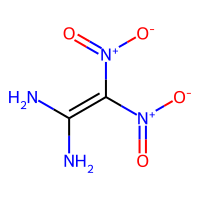
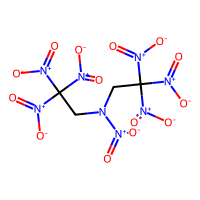
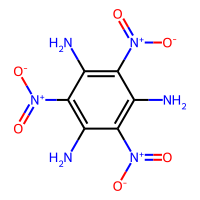
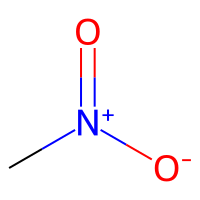
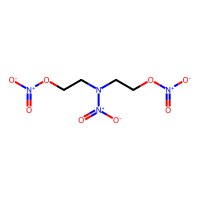

In [80]:
data_copy.head()

In [81]:
data_copy.shape

(147, 25)

In [82]:
duples = data_copy.drop_duplicates(['smile']) #get rid of duplicates
duples.shape

(130, 25)

In [83]:
duples.columns

Index(['SMILES', 'Material Density ', 'PC ', 'Nitrogen density (g/cm3)', 'OB',
       'Nm', 'H2O', 'CH3OH', 'C4H8O2', 'C4H6O2', 'gasous N2', 'gasous H2O',
       'gasous CO2', ' solid C', 'gasous NH3', 'gasous O2', 'Type1',
       'Length1 ', 'Strength 1', 'Qmax', 'D', 'pC-J', 'LE', 'ROMol', 'smile'],
      dtype='object')

In [84]:
duples.Type1.value_counts()

N-C    55
O-N    32
C-C    26
N-N    11
O-C     6
Name: Type1, dtype: int64

### Converting Categorical Features 
#### It is important to convert categorical features to dummy variables. Otherwise, the machine learning algorithm won't be able to directly take in those features as inputs.

In [85]:
cat_feats = ['Type1']
final_data = pd.get_dummies(duples, columns=cat_feats, drop_first=True) 

In [86]:
final_data.columns

Index(['SMILES', 'Material Density ', 'PC ', 'Nitrogen density (g/cm3)', 'OB',
       'Nm', 'H2O', 'CH3OH', 'C4H8O2', 'C4H6O2', 'gasous N2', 'gasous H2O',
       'gasous CO2', ' solid C', 'gasous NH3', 'gasous O2', 'Length1 ',
       'Strength 1', 'Qmax', 'D', 'pC-J', 'LE', 'ROMol', 'smile', 'Type1_N-C',
       'Type1_N-N', 'Type1_O-C', 'Type1_O-N'],
      dtype='object')

### Data enrichment (new descriptors)

In [87]:
from rdkit.Chem.Descriptors import MolWt, MolLogP, NumAromaticRings, NumHDonors, NumHAcceptors

In [88]:
def calc_descriptors(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol:
        mw, logp, num_arom_rings, hbd, hba = [x(mol) for x in [MolWt, MolLogP, NumAromaticRings, NumHDonors, NumHAcceptors]]
        res = [mw, logp, num_arom_rings, hbd, hba]
    else:
        res = [None] * 5
    return res

In [89]:
from tqdm.notebook import tqdm
tqdm.pandas()

  0%|          | 0/130 [00:00<?, ?it/s]

,SMILES,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,...,D,pC-J,LE,ROMol,smile,Type1_N-C,Type1_N-N,Type1_O-C,Type1_O-N,desc
0,,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,...,8.24,31.83,33.97,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,NC(N)=C([N+](=O)[O-])[N+](=O)[O-],1,0,0,0,"[148.078, -1.4161999999999995, 0, 2, 6]"
1,,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,...,8.59,35.08,18.83,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,O=[N+]([O-])N(CC([N+](=O)[O-])([N+](=O)[O-])[N...,0,0,0,0,"[388.1180000000001, -2.5520999999999976, 0, 0,..."
2,,1.98,78.2,0.64,-55.8,2,0.0,0,0,0.0,...,7.68,28.17,30.17,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,Nc1c([N+](=O)[O-])c(N)c([N+](=O)[O-])c(N)c1[N+...,1,0,0,0,"[258.15, 0.15780000000000016, 1, 3, 9]"
3,,1.49,69.5,0.34,-39.3,4,0.0,0,0,0.0,...,7.46,22.28,14.97,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,C[N+](=O)[O-],1,0,0,0,"[61.040000000000006, -0.10710000000000008, 0, ..."
6,,1.73,73.8,0.40,-26.7,4,0.0,0,0,0.0,...,8.26,30.10,28.14,<rdkit.Chem.rdchem.Mol object at 0x000002BF4ED...,O=[N+]([O-])OCCN(CCO[N+](=O)[O-])[N+](=O)[O-],0,0,1,0,"[240.128, -1.1032999999999995, 0, 0, 8]"

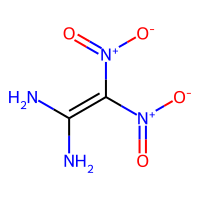
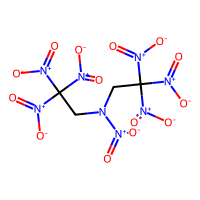
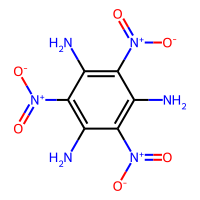
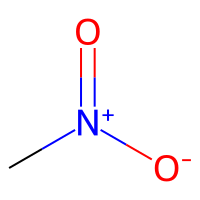
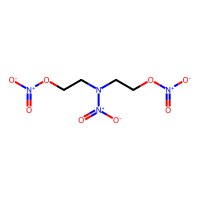

In [90]:
final_data['desc'] = final_data.smile.progress_apply(calc_descriptors)
final_data.head()

In [91]:
final_data.drop(['SMILES'],axis=1,inplace=True)
final_data.drop(['ROMol'],axis=1,inplace=True)
final_data.drop(['smile'],axis=1,inplace=True)

In [92]:
final_data.head()

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,...,Strength 1,Qmax,D,pC-J,LE,Type1_N-C,Type1_N-N,Type1_O-C,Type1_O-N,desc
0,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,33.33,...,121.69,956.21,8.24,31.83,33.97,1,0,0,0,"[148.078, -1.4161999999999995, 0, 2, 6]"
1,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,33.33,...,85.66,1061.80,8.59,35.08,18.83,0,0,0,0,"[388.1180000000001, -2.5520999999999976, 0, 0,..."
2,1.98,78.2,0.64,-55.8,2,0.0,0,0,0.0,25.00,...,124.08,889.40,7.68,28.17,30.17,1,0,0,0,"[258.15, 0.15780000000000016, 1, 3, 9]"
3,1.49,69.5,0.34,-39.3,4,0.0,0,0,0.0,16.67,...,90.05,1276.30,7.46,22.28,14.97,1,0,0,0,"[61.040000000000006, -0.10710000000000008, 0, ..."
6,1.73,73.8,0.40,-26.7,4,0.0,0,0,0.0,20.00,...,68.74,1346.80,8.26,30.10,28.14,0,0,1,0,"[240.128, -1.1032999999999995, 0, 0, 8]"


In [93]:
final_data[['MW','LogP','NumAromatic','HBD','HBA']] =  pd.DataFrame(final_data.desc.tolist(), index= final_data.index)
final_data.head()

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,...,Type1_N-C,Type1_N-N,Type1_O-C,Type1_O-N,desc,MW,LogP,NumAromatic,HBD,HBA
0,1.92,78.8,0.73,-21.6,8,0.0,0,0,0.0,33.33,...,1,0,0,0,"[148.078, -1.4161999999999995, 0, 2, 6]",148.078,-1.4162,0,2,6
1,1.96,74.9,0.57,16.5,4,0.0,0,0,0.0,33.33,...,0,0,0,0,"[388.1180000000001, -2.5520999999999976, 0, 0,...",388.118,-2.5521,0,0,14
2,1.98,78.2,0.64,-55.8,2,0.0,0,0,0.0,25.00,...,1,0,0,0,"[258.15, 0.15780000000000016, 1, 3, 9]",258.150,0.1578,1,3,9
3,1.49,69.5,0.34,-39.3,4,0.0,0,0,0.0,16.67,...,1,0,0,0,"[61.040000000000006, -0.10710000000000008, 0, ...",61.040,-0.1071,0,0,2
6,1.73,73.8,0.40,-26.7,4,0.0,0,0,0.0,20.00,...,0,0,1,0,"[240.128, -1.1032999999999995, 0, 0, 8]",240.128,-1.1033,0,0,8


In [94]:
final_data.drop("desc",axis=1,inplace=True)

In [95]:
final_data

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,...,LE,Type1_N-C,Type1_N-N,Type1_O-C,Type1_O-N,MW,LogP,NumAromatic,HBD,HBA
0,1.92,78.80,0.73,-21.60,8,0.0,0,0,0.0,33.33,...,33.97,1,0,0,0,148.078,-1.4162,0,2,6
1,1.96,74.90,0.57,16.50,4,0.0,0,0,0.0,33.33,...,18.83,0,0,0,0,388.118,-2.5521,0,0,14
2,1.98,78.20,0.64,-55.80,2,0.0,0,0,0.0,25.00,...,30.17,1,0,0,0,258.150,0.1578,1,3,9
3,1.49,69.50,0.34,-39.30,4,0.0,0,0,0.0,16.67,...,14.97,1,0,0,0,61.040,-0.1071,0,0,2
6,1.73,73.80,0.40,-26.70,4,0.0,0,0,0.0,20.00,...,28.14,0,0,1,0,240.128,-1.1033,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.54,68.00,0.60,-89.26,4,0.0,0,0,0.0,25.00,...,50.11,1,0,0,0,362.222,0.1548,3,1,13
138,1.69,72.00,0.92,-68.70,8,0.0,0,0,0.0,35.00,...,65.50,0,0,0,0,126.123,-1.3579,1,2,6
139,1.60,69.90,0.22,-111.40,4,0.0,0,0,0.0,8.70,...,43.20,1,0,0,0,173.171,2.7480,2,0,2
140,1.75,73.30,0.50,-55.00,8,0.0,0,0,0.0,23.81,...,38.92,0,0,0,1,242.147,1.4529,1,1,7


### Clustering of molecules after data enrichment

In [96]:
explosives_descriptors = final_data.drop(labels = ['Qmax'],axis = 1)
explosives_properties = final_data['Qmax']
pca_column_names = ['First principal component', 'Second Principal Component']
pca = PCA(n_components=2)
PCA_ex = pca.fit_transform(explosives_descriptors)
pca_df = pd.DataFrame(PCA_ex, columns=pca_column_names, index=explosives_descriptors.index)

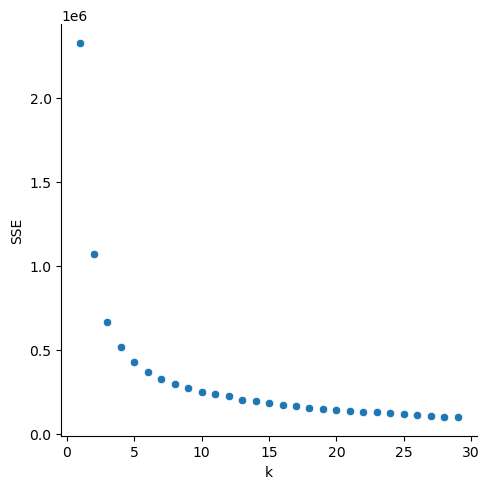

In [97]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
k_rng = range(1,30)
sum_squared_error_groups = [] 

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(explosives_descriptors)
    sum_squared_error_groups.append(km.inertia_)

finding_k_results = pd.DataFrame({'k': k_rng, 'SSE': sum_squared_error_groups})

sns.relplot(data=finding_k_results, x='k', y='SSE')
# plt.savefig('Elbow2.jpeg')

<AxesSubplot: xlabel='First principal component', ylabel='Second Principal Component'>

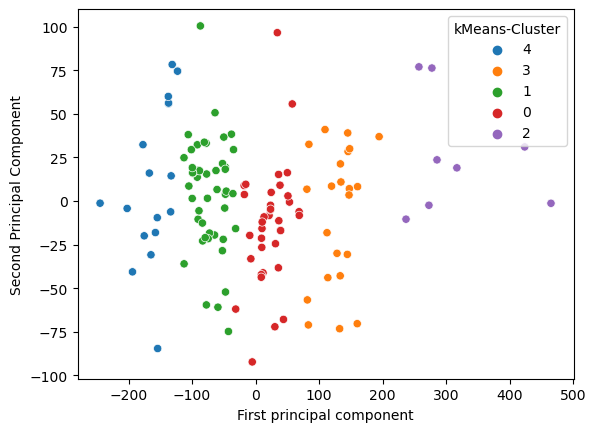

In [98]:
km = KMeans(n_clusters=5)

clusters = km.fit(explosives_descriptors)

clusters_df = pd.DataFrame([",".join(group) for group in clusters.labels_.astype(str)], index=pca_df.index, columns=['kMeans-Cluster'])

pca_kMeans = pd.concat([pca_df, clusters_df], axis='columns')

sns.scatterplot(data=pca_kMeans, x='First principal component', y='Second Principal Component', hue='kMeans-Cluster')
# plt.savefig('KMeans2.jpeg')

## Split data into training and test set

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('Qmax', axis=1), 
                                                    final_data['Qmax'], test_size=0.30, 
                                                    random_state=42)

## Build predictive model and apply and evaluate the model to the test set

### Regression

#### LinearRegression

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [102]:
lr_pred = lr.predict(X_test_scaled)

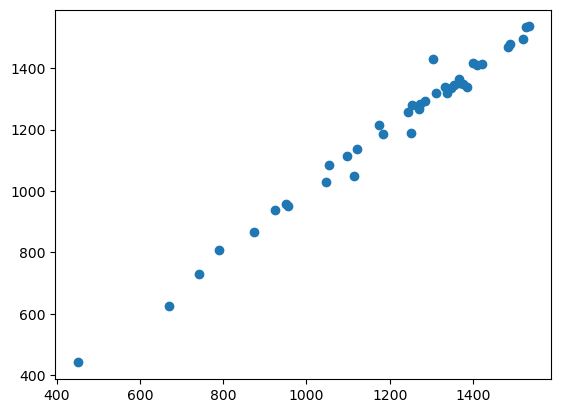

In [103]:
plt.scatter(y_test, lr_pred)
# plt.savefig('deleted.jpeg')

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, lr_pred)
rmse = mse**.5
r2 = r2_score(y_test, lr_pred)
mae = mean_absolute_error(y_test, lr_pred)
print(rmse)
print(r2)
print(mae)

30.922941974928325
0.9848373400935573
20.27101277290366


In [105]:
coefficients_df = pd.Series(lr.coef_, index=X_test.columns)
coefficients_df.sort_values(ascending=False) #now solid C inversed correlated, how it shoud be 

D                           4.203094e+02
Type1_O-N                   1.709193e+01
MW                          1.540356e+01
Type1_N-N                   1.362570e+01
LogP                        1.000372e+01
Length1                     4.355123e+00
PC                          3.805497e+00
CH3OH                       3.473990e+00
Type1_N-C                   3.160379e+00
H2O                         3.091387e+00
Nitrogen density (g/cm3)    1.701486e+00
Strength 1                  1.606078e+00
C4H6O2                      6.061345e-09
Nm                         -3.393677e-01
Type1_O-C                  -5.384420e-01
C4H8O2                     -1.478461e+00
pC-J                       -5.278353e+00
HBA                        -6.246590e+00
NumAromatic                -7.727476e+00
HBD                        -1.389773e+01
LE                         -1.585830e+01
OB                         -1.387519e+02
Material Density           -1.826649e+02
gasous NH3                 -7.890972e+02
gasous O2       

In [106]:
m = pd.DataFrame(y_test, index=y_test.index)
m['pred']= lr_pred
m

,Qmax,pred
63,1054.10,1084.485769
48,923.50,939.382218
21,1483.20,1470.692938
38,1244.50,1256.521506
123,1520.20,1494.057783
64,1353.50,1344.479129
77,1283.60,1293.307724
113,1533.70,1536.025443
89,1366.20,1353.044207
31,1399.00,1417.497497


#### RandomForest

In [107]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)
rfc_pred = rfc.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, rfc_pred)
rmse = mse**.5
r2 = r2_score(y_test, rfc_pred)
mae = mean_absolute_error(y_test, rfc_pred)
print(rmse)
print(r2)
print(mae)

139.47074576812858
0.6915533702726695
91.6045179487181


### Classificattion

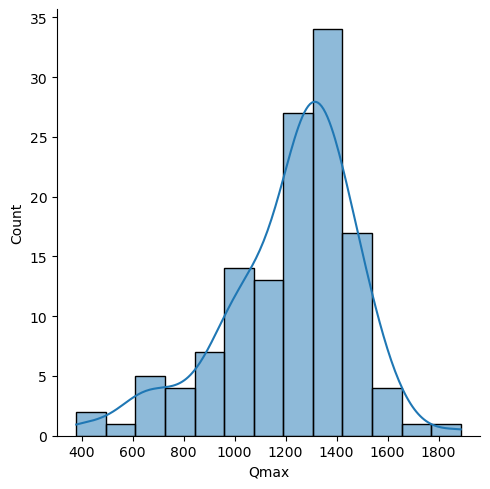

In [108]:
sns.displot(final_data['Qmax'], kde = True)
plt.savefig('barplot.jpeg')

In [109]:
final_data.loc[final_data['Qmax'] < 1200, 'Qmax'] = 0
final_data.loc[final_data['Qmax'] >= 1200, 'Qmax'] = 1

In [110]:
final_data

,Material Density,PC,Nitrogen density (g/cm3),OB,Nm,H2O,CH3OH,C4H8O2,C4H6O2,gasous N2,...,LE,Type1_N-C,Type1_N-N,Type1_O-C,Type1_O-N,MW,LogP,NumAromatic,HBD,HBA
0,1.92,78.80,0.73,-21.60,8,0.0,0,0,0.0,33.33,...,33.97,1,0,0,0,148.078,-1.4162,0,2,6
1,1.96,74.90,0.57,16.50,4,0.0,0,0,0.0,33.33,...,18.83,0,0,0,0,388.118,-2.5521,0,0,14
2,1.98,78.20,0.64,-55.80,2,0.0,0,0,0.0,25.00,...,30.17,1,0,0,0,258.150,0.1578,1,3,9
3,1.49,69.50,0.34,-39.30,4,0.0,0,0,0.0,16.67,...,14.97,1,0,0,0,61.040,-0.1071,0,0,2
6,1.73,73.80,0.40,-26.70,4,0.0,0,0,0.0,20.00,...,28.14,0,0,1,0,240.128,-1.1033,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1.54,68.00,0.60,-89.26,4,0.0,0,0,0.0,25.00,...,50.11,1,0,0,0,362.222,0.1548,3,1,13
138,1.69,72.00,0.92,-68.70,8,0.0,0,0,0.0,35.00,...,65.50,0,0,0,0,126.123,-1.3579,1,2,6
139,1.60,69.90,0.22,-111.40,4,0.0,0,0,0.0,8.70,...,43.20,1,0,0,0,173.171,2.7480,2,0,2
140,1.75,73.30,0.50,-55.00,8,0.0,0,0,0.0,23.81,...,38.92,0,0,0,1,242.147,1.4529,1,1,7


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('Qmax', axis=1), 
                                                    final_data['Qmax'], test_size=0.30, 
                                                    random_state=42)

#### RandomForest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
rfc_pred = rfc.predict(X_test)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.60      0.72        15
         1.0       0.79      0.96      0.87        24

    accuracy                           0.82        39
   macro avg       0.85      0.78      0.79        39
weighted avg       0.83      0.82      0.81        39



#### LogisticRegression

In [115]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [116]:
predictions = logmodel.predict(X_test)

In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        15
         1.0       0.92      1.00      0.96        24

    accuracy                           0.95        39
   macro avg       0.96      0.93      0.94        39
weighted avg       0.95      0.95      0.95        39



#### DecisionTree

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [119]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        15
         1.0       0.88      0.92      0.90        24

    accuracy                           0.87        39
   macro avg       0.87      0.86      0.86        39
weighted avg       0.87      0.87      0.87        39

